In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Check if GPU is available
# physical_devices = tf.config.list_physical_devices('GPU')
# if physical_devices:
#     tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Define the data generator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/capstone/train',
    target_size=(32, 32),
    batch_size=64,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/capstone/valid',
    target_size=(32, 32),
    batch_size=64,
    class_mode='categorical')

# Get the number of classes
num_classes = len(train_generator.class_indices)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define the callbacks
checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=[checkpoint]
)

Found 5031 images belonging to 4 classes.
Found 632 images belonging to 4 classes.
Epoch 1/20
79/79 [==============================] - ETA: 0s - loss: 0.9076 - accuracy: 0.6557
Epoch 1: val_accuracy improved from -inf to 0.82753, saving model to best_model.h5
79/79 [==============================] - 50s 615ms/step - loss: 0.9076 - accuracy: 0.6557 - val_loss: 0.5064 - val_accuracy: 0.8275
Epoch 2/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


79/79 [==============================] - ETA: 0s - loss: 0.4922 - accuracy: 0.8088
Epoch 2: val_accuracy improved from 0.82753 to 0.87184, saving model to best_model.h5
79/79 [==============================] - 32s 405ms/step - loss: 0.4922 - accuracy: 0.8088 - val_loss: 0.3280 - val_accuracy: 0.8718
Epoch 3/20
79/79 [==============================] - ETA: 0s - loss: 0.3736 - accuracy: 0.8611
Epoch 3: val_accuracy improved from 0.87184 to 0.87500, saving model to best_model.h5
79/79 [==============================] - 32s 407ms/step - loss: 0.3736 - accuracy: 0.8611 - val_loss: 0.3156 - val_accuracy: 0.8750
Epoch 4/20
79/79 [==============================] - ETA: 0s - loss: 0.3434 - accuracy: 0.8716
Epoch 4: val_accuracy did not improve from 0.87500
79/79 [==============================] - 31s 394ms/step - loss: 0.3434 - accuracy: 0.8716 - val_loss: 0.3013 - val_accuracy: 0.8750
Epoch 5/20
79/79 [==============================] - ETA: 0s - loss: 0.2999 - accuracy: 0.8853
Epoch 5: val_acc

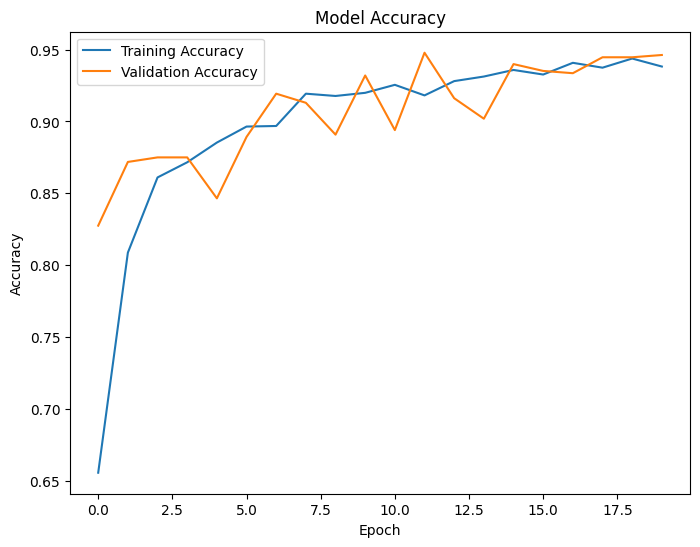

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

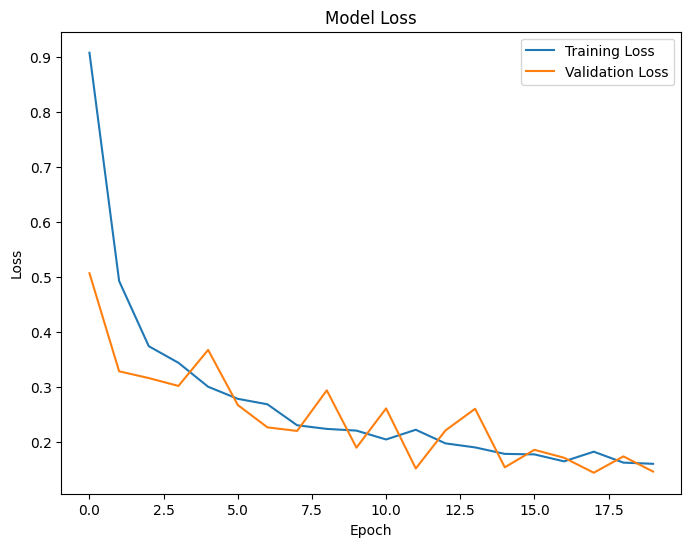

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np


10/10 [==============================] - 4s 345ms/step


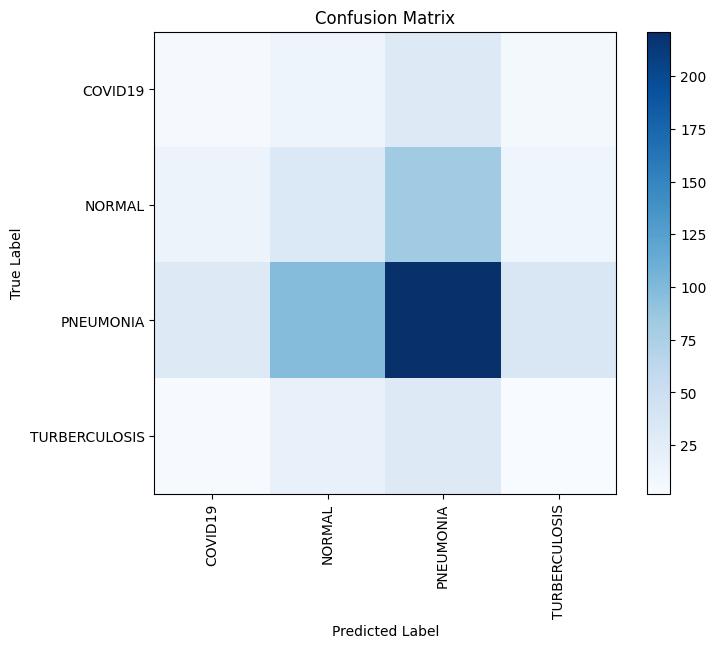

In [ ]:
y_pred = model.predict(val_generator)
y_pred = np.argmax(y_pred, axis=1)
y_true = val_generator.classes

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, val_generator.class_indices.keys(), rotation=90)
plt.yticks(tick_marks, val_generator.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()